# Read phytoplankton data and add functional group info

In [4]:
library(tidyverse, warn.conflicts = FALSE)
library(cowplot, warn.conflicts = FALSE)
library(scales, warn.conflicts = FALSE)

# library to read matlab data formats into R
library(reshape2)
library(lubridate)

In [5]:
library(worrms)

In [6]:
ds <- read.csv("../VeryNEWESTCariacoData/phytoplankton.csv")

ds$Datetime_UTC = parse_date_time(ds$Datetime_UTC, orders = "%Y-%m-%d H:M:S")
ds$Datetime_local = parse_date_time(ds$Datetime_local, orders = "%Y-%m-%d H:M:S")

ds$date = ds$Datetime_UTC

## now read Functional Group annotated csv

In [7]:
annotated_fg <- read.csv("worms_dat_annotated_OLDFUNCGROUP.csv", sep=";", dec=',', stringsAsFactor=FALSE)
#annotated_fg = annotated_fg[complete.cases(annotated_fg),]

# trim dataframe to relevant columns
AphiaID2FG <- data.frame("AphiaID" = annotated_fg$AphiaID, 
                         "FuncGroup"=as.character(annotated_fg$functionalgroup_old), 
                         stringsAsFactors=FALSE)

## and merge with ds by AphiaID

In [8]:
ds_FG <- merge(ds, AphiaID2FG, all=TRUE)

In [9]:
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "nanoflagellates"]   <- "NANOFLAGELLATES"
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "palmelloid colony"] <- "PALMELLOIDCOLONY"

# Now let's plot some raw counts:

In [10]:
options(repr.plot.width=15, repr.plot.height=7)

Warning message:
“Removed 1 rows containing missing values (geom_point).”


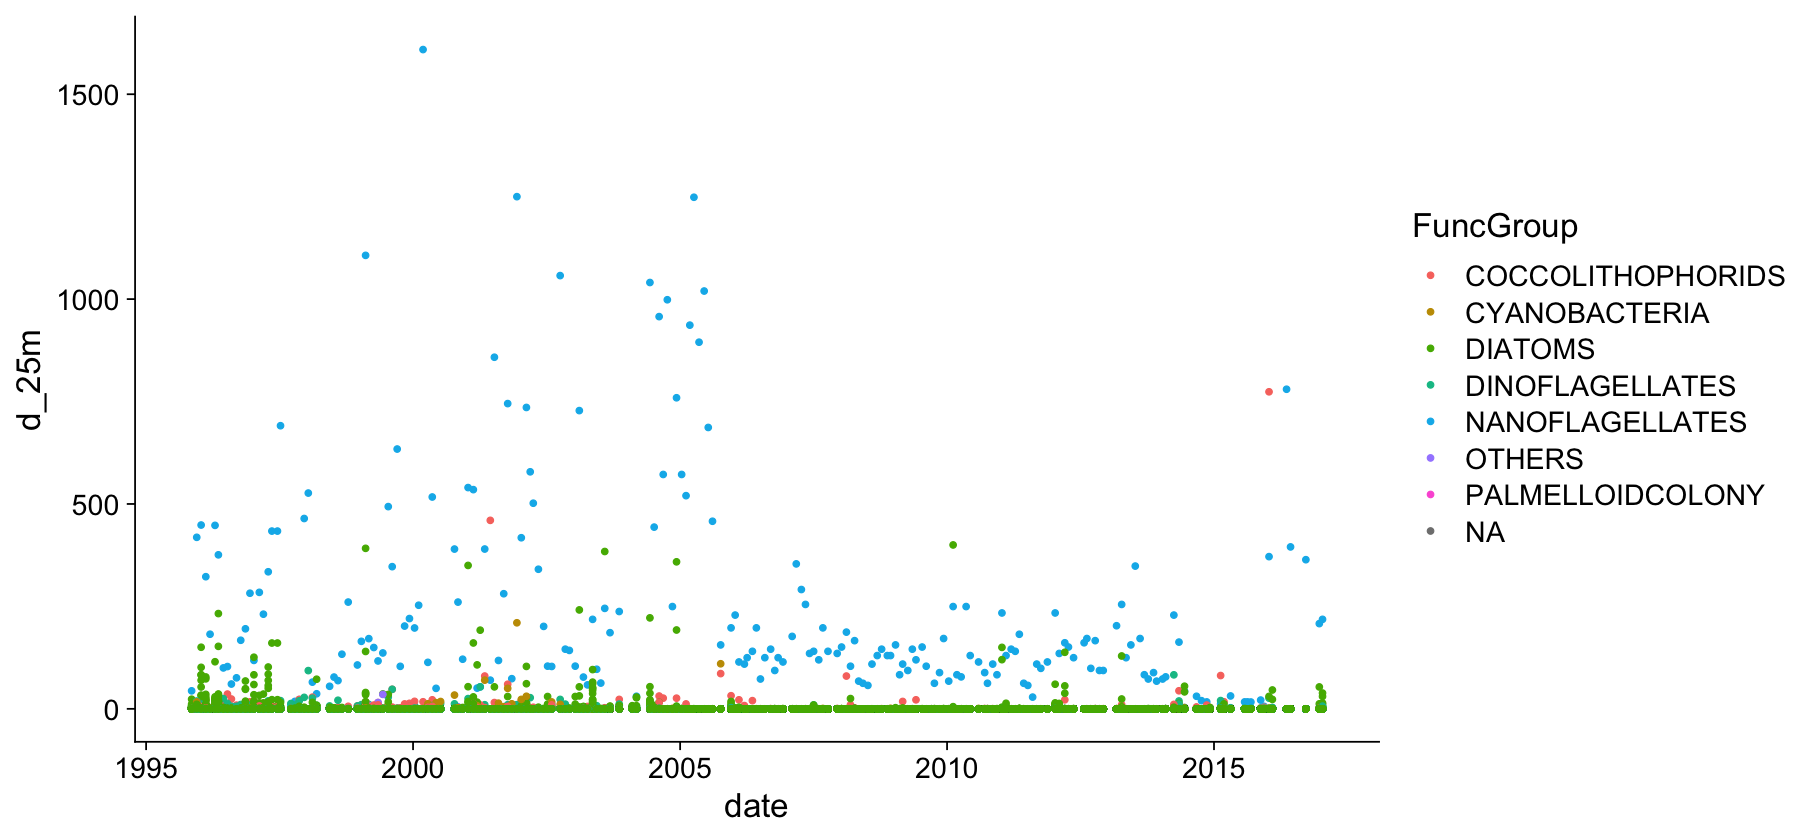

In [12]:
ggplot(data=ds_FG, aes(x=date, y=d_25m, color=FuncGroup)) + geom_point() + theme_cowplot(font_size=20)

In [13]:
blob <- rbind(data.frame(val=ds_FG$d_1m, depth=1, date=ds_FG$date, AphiaID=ds_FG$AphiaID , FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_7m, depth=7, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_15m, depth=15, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_25m, depth=25, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_55m, depth=55, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_75m, depth=75, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup),
      data.frame(val=ds_FG$d_100m, depth=100, date=ds_FG$date, AphiaID=ds_FG$AphiaID, FuncGroup=ds_FG$FuncGroup))

In [14]:
blob

val,depth,date,AphiaID,FuncGroup
<dbl>,<dbl>,<dttm>,<dbl>,<chr>
0.000,1,2017-01-12 08:17:00,-9.223372e+18,NA
0.000,1,1996-02-13 08:16:00,-9.223372e+18,PALMELLOIDCOLONY
0.000,1,2002-07-09 10:00:00,-9.223372e+18,NA
0.000,1,2002-07-09 10:00:00,-9.223372e+18,NA
0.000,1,2002-07-09 10:00:00,-9.223372e+18,NA
124.800,1,2004-11-09 08:31:00,-9.223372e+18,NANOFLAGELLATES
0.000,1,2006-03-16 12:20:00,-9.223372e+18,PALMELLOIDCOLONY
0.000,1,2003-02-11 08:49:00,-9.223372e+18,PALMELLOIDCOLONY
0.000,1,2009-11-10 09:05:00,-9.223372e+18,PALMELLOIDCOLONY


In [15]:
# Function to read specific verfication type from dataset

prepdataframe <- function(funcgroup='', datasource='blob'){
    if(datasource=='blob'){
    DF <- blob
    #print(names(DF))
    
    DF_FG <- DF %>%
     filter(FuncGroup == funcgroup)
    
    VarDF <- DF_FG %>%
      select(date, val, depth) %>%
      gather(key='key',value = "value", -date, -depth)
    #head(VarDF)
    }
    
    return(VarDF)
}

In [25]:
# Interpolate
interpolateDF <- function(DF,func='linear'){
    zz <- seq(0, 100, 1)
    
    if(func=='linear'){
        IntDF <- DF %>%
            group_by(date) %>%
            filter(sum(!is.na(value))>1) %>%
            do(data.frame(value_int = with(.,approx(depth, value, zz)), depth = zz)) 
        
        IntDF <- IntDF %>% 
              rename(
                value_int = value_int.y
                )
        IntDF$value_int.x <- NULL
        }
    
    return(IntDF)
}

In [26]:
#diatoms <- prepdataframe("DIATOMS")

In [34]:

getfuncgroupint <- function(funcgroup){
    
        fg_dat <- prepdataframe(funcgroup)

        fg_dat_int <- interpolateDF(fg_dat)

        fg_dat_sum <- fg_dat_int %>%
            group_by(date) %>%
            filter(depth<101) %>%
            filter(sum(is.na(value_int))<20) %>%
            summarize(value_sum = sum(value_int, na.rm=TRUE), 
                      value_mean = mean(value_int, na.rm=TRUE),
                      value_intgrtd = value_mean * 100,
                      NAs = sum(is.na(value_int)), .groups="keep")   

}

In [40]:
defaultW <- getOption("warn")
options(warn = -1)


diatoms_sum <- getfuncgroupint("DIATOMS")

dino_sum <- getfuncgroupint("DINOFLAGELLATES")

cyano_sum <- getfuncgroupint("CYANOBACTERIA")

nano_sum <- getfuncgroupint("NANOFLAGELLATES")

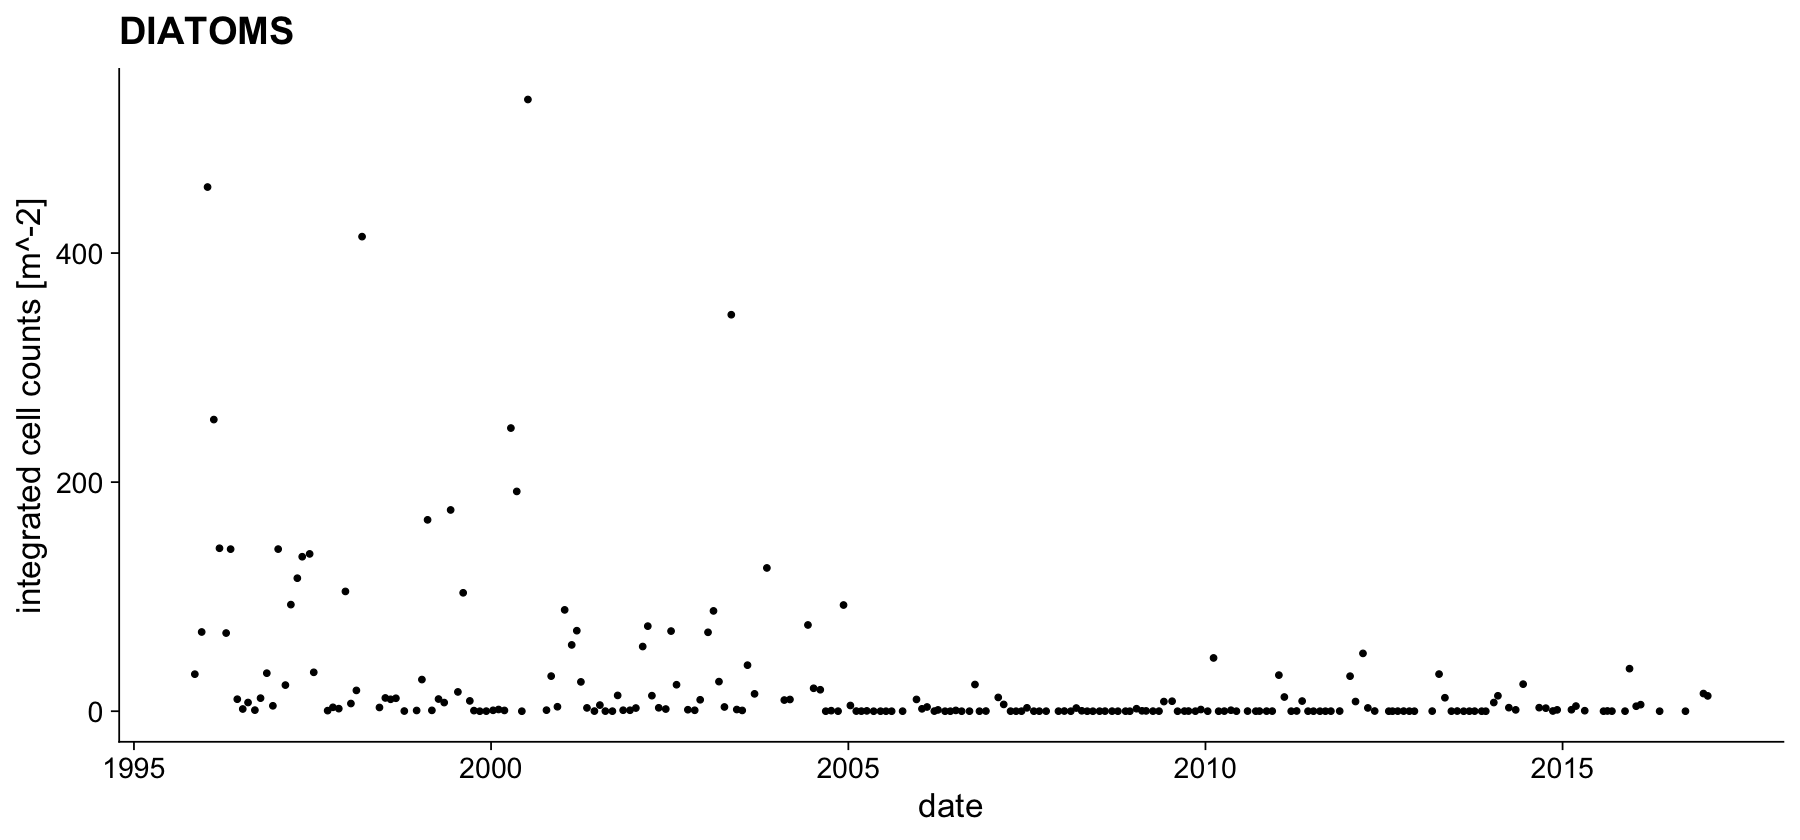

In [38]:
ggplot(data=diatoms_sum, aes(x=date, y=value_intgrtd)) + geom_point() + theme_cowplot(font_size=20)+
 ggtitle("DIATOMS") + ylab("integrated cell counts [m^-2]")

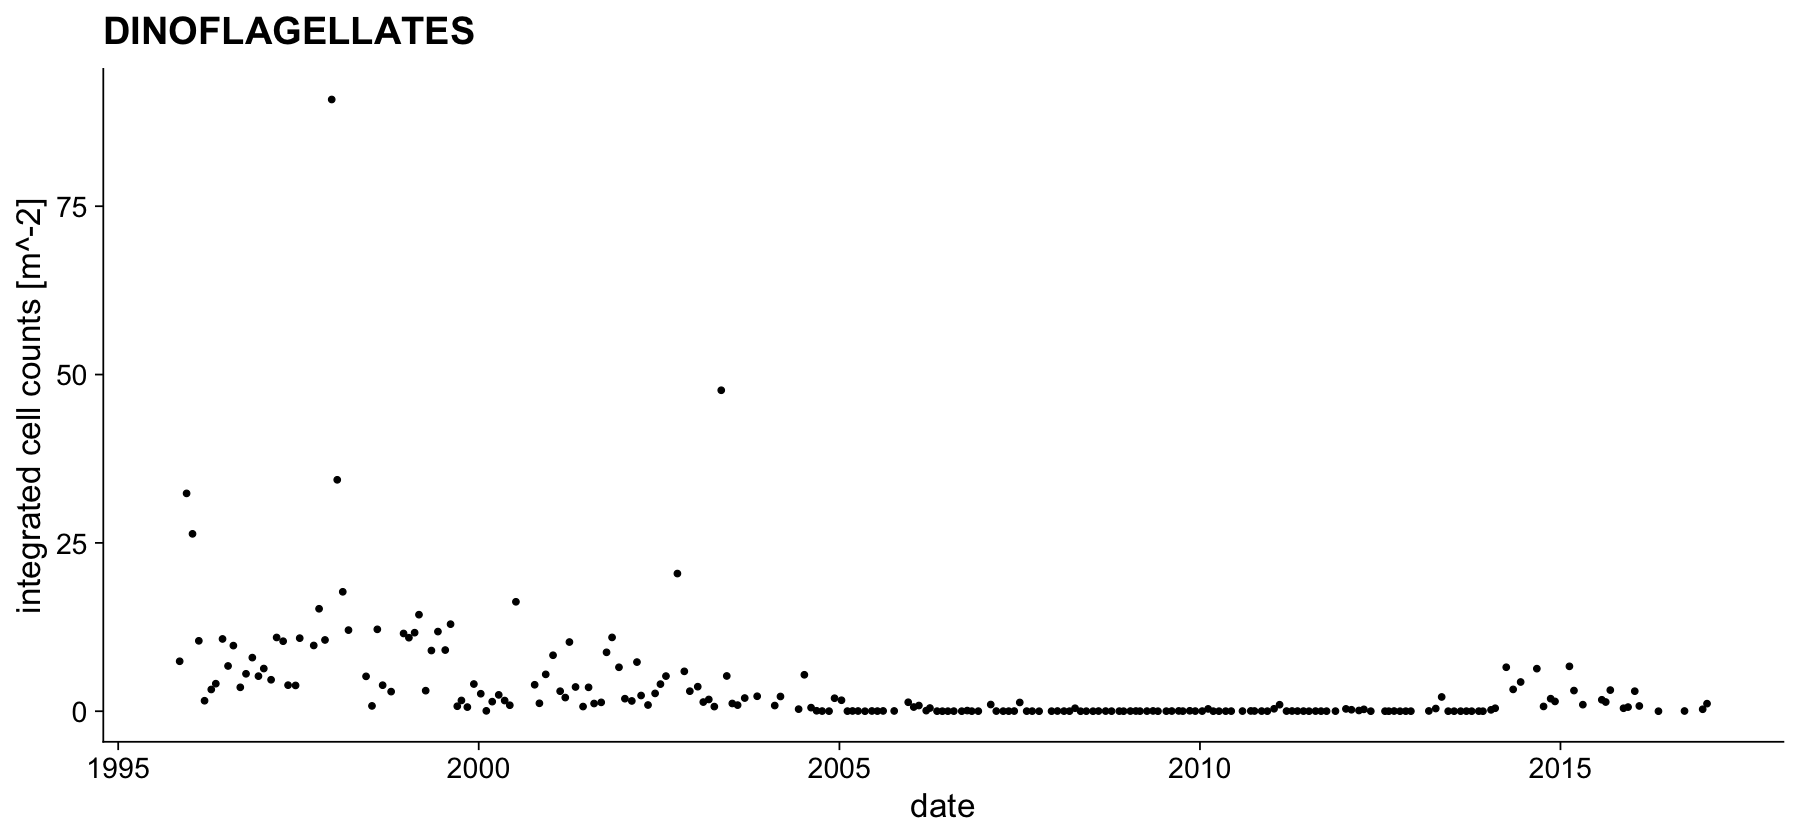

In [39]:
ggplot(data=dino_sum, aes(x=date, y=value_intgrtd)) + geom_point() + theme_cowplot(font_size=20)+
 ggtitle("DINOFLAGELLATES") + ylab("integrated cell counts [m^-2]")

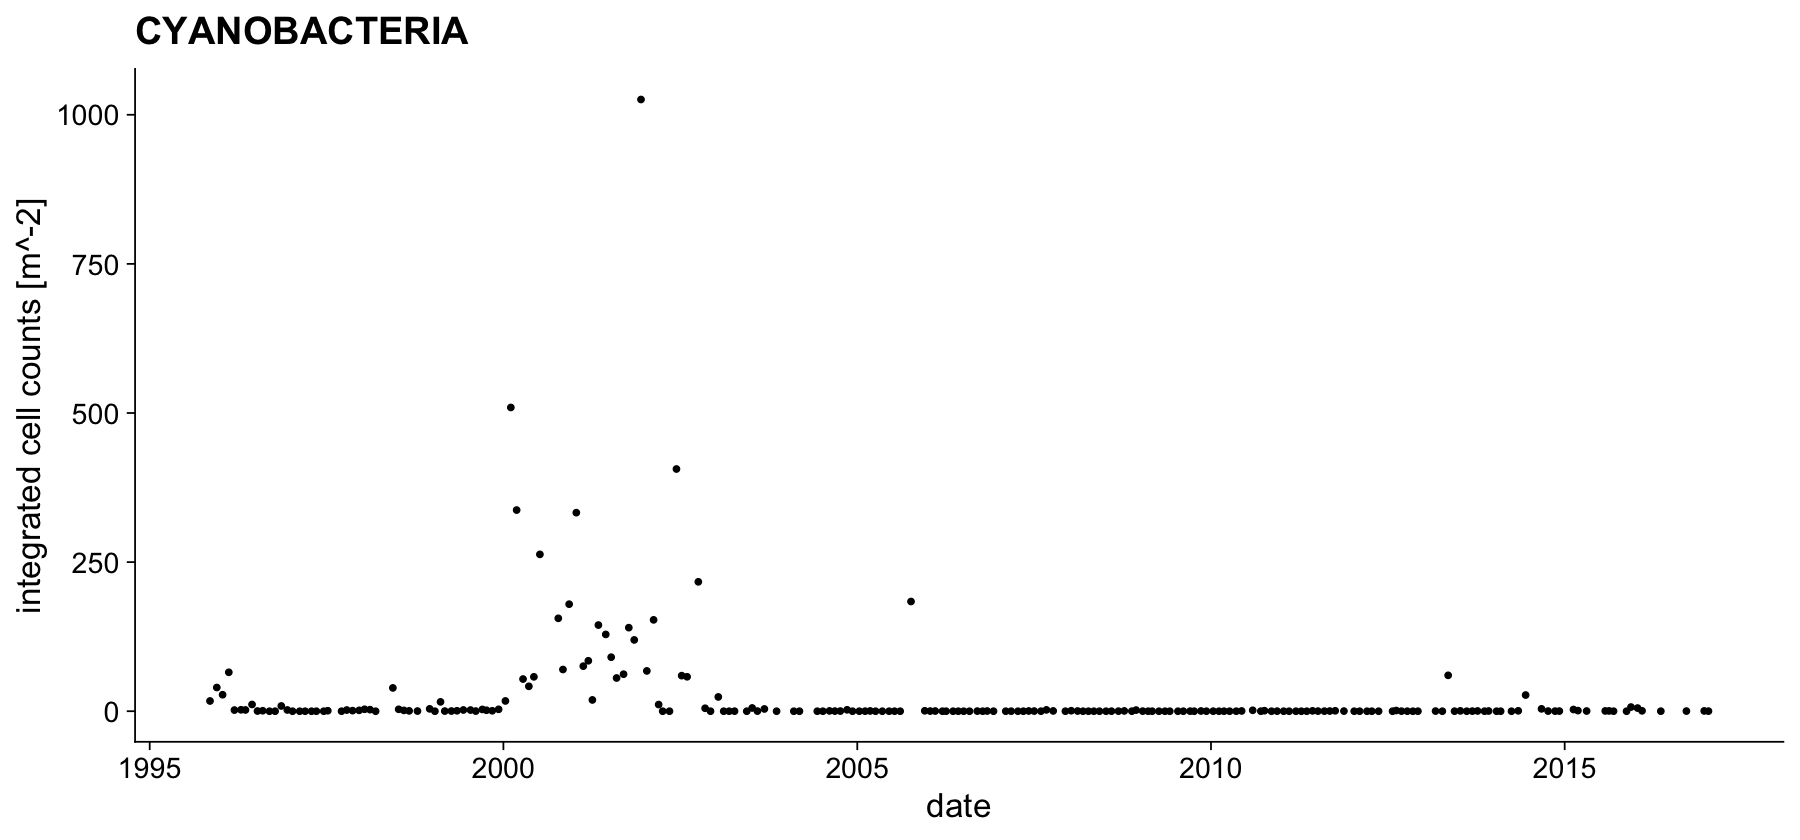

In [42]:
ggplot(data=cyano_sum, aes(x=date, y=value_intgrtd)) + geom_point() + theme_cowplot(font_size=20)+
 ggtitle("CYANOBACTERIA") + ylab("integrated cell counts [m^-2]")

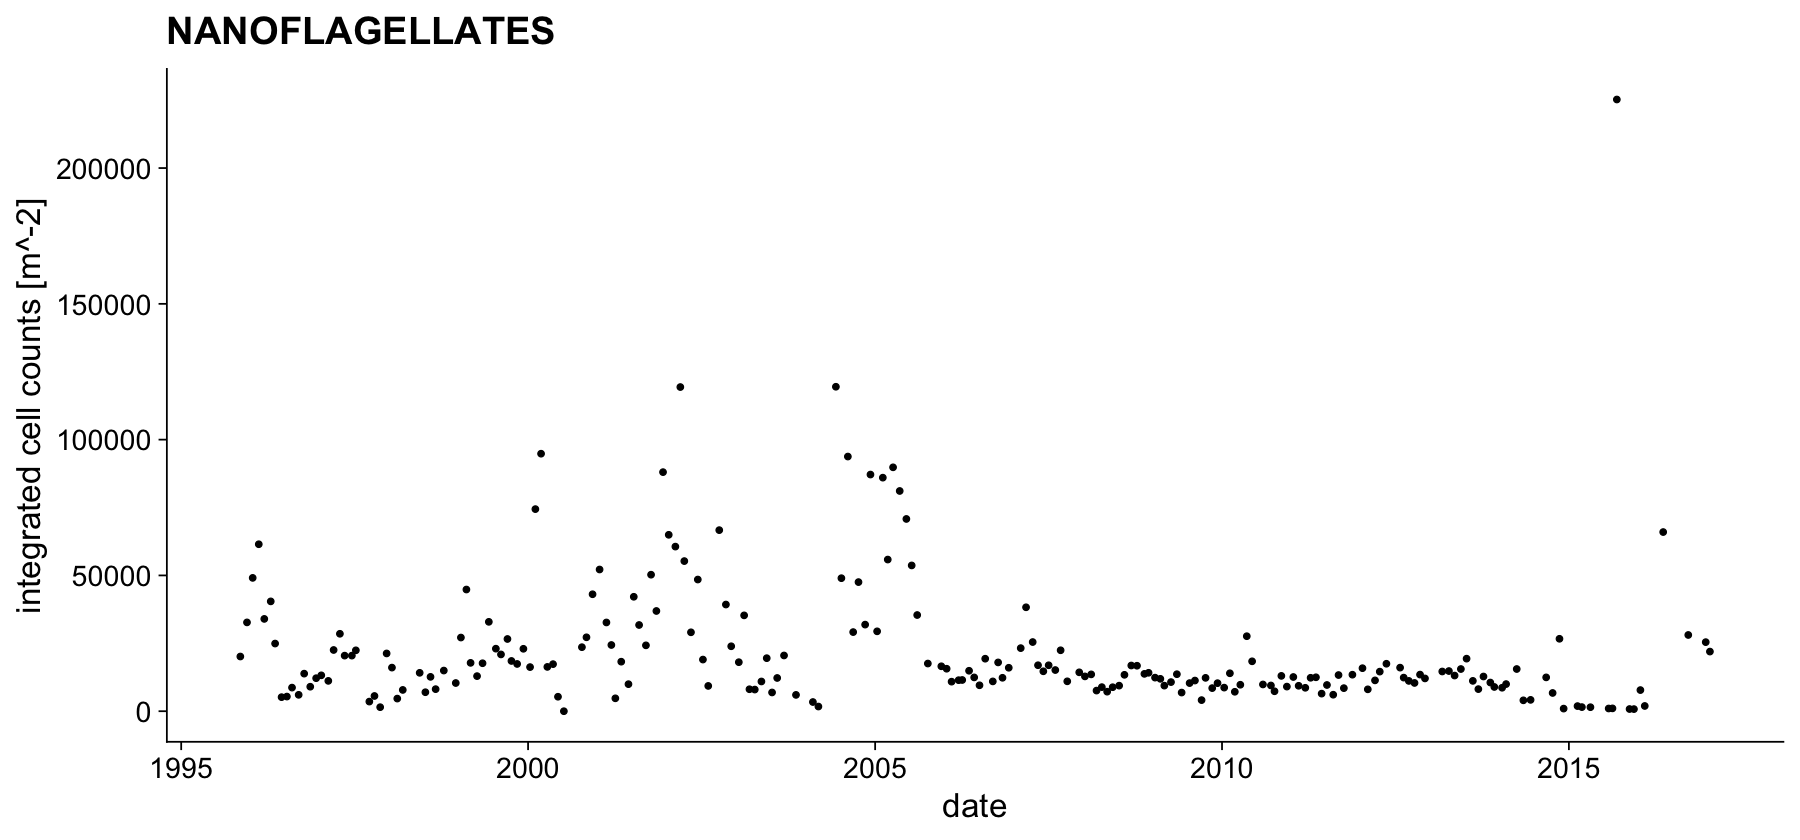

In [43]:
ggplot(data=nano_sum, aes(x=date, y=value_intgrtd)) + geom_point() + theme_cowplot(font_size=20)+
 ggtitle("NANOFLAGELLATES") + ylab("integrated cell counts [m^-2]")

In [ ]:
interpolatedmerge <- function(var, windvar){
 
    niskin_dat <- prepdataframe(var)

    niskin_int <- interpolateDF(niskin_dat, 'linear')   
    
    niskin_sum <- niskin_int %>%
        group_by(date) %>%
        filter(depth<101) %>%
        filter(sum(is.na(value_int))<20) %>%
        summarize(value_sum = sum(value_int, na.rm=TRUE), 
                  value_mean = mean(value_int, na.rm=TRUE),
                  value_intgrtd = value_mean * 100,
                  NAs = sum(is.na(value_int)), .groups="keep")
    
    niskin_sum_monthly <- niskin_sum %>%
          mutate(time_month = format(date, format="%m-%Y"))
    
    wind_ds_var <- wind_ds_monthly %>%
          select(time_month, windvar)
    
    wind_niskin <- merge(wind_ds_var, niskin_sum_monthly, all=TRUE)
    
    wind_niskin$time <- parse_date_time(wind_niskin$time_month, orders="%m-%Y")
    
    wind_niskin_addyear <- wind_niskin %>%
        mutate(year = format(date, format="%Y")) %>%
        group_by(year) %>%
        mutate(value_yearly_mean = mean(value_intgrtd, na.rm=TRUE))

    
    return(wind_niskin_addyear)
}

# save code: